<code> 1. What Is Logistic Regression?</code>
<pre>Logistic Regression is a supervised learning algorithm used for binary classification problems (yes/no, 0/1, true/false). 
Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities that are then mapped to 
class labels using a threshold (commonly 0.5).</pre>

<code>Perceptron</code>

In [30]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [116]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=30)

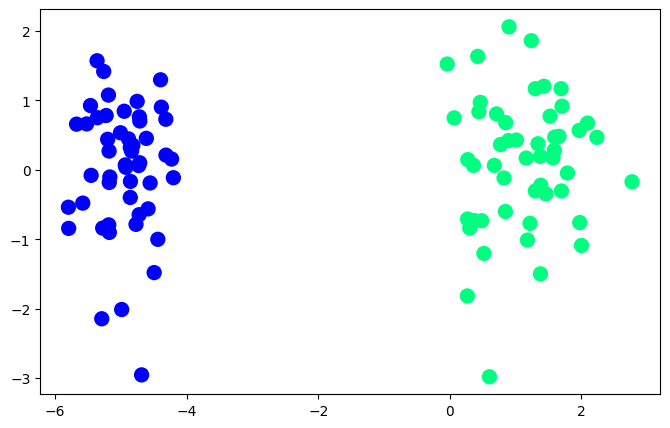

In [117]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)

In [118]:
lor = LogisticRegression()
lor.fit(X,y)
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
m,b

(np.float64(-148.89041745447042), array([-297.9404898]))

(-3.0, 3.0)

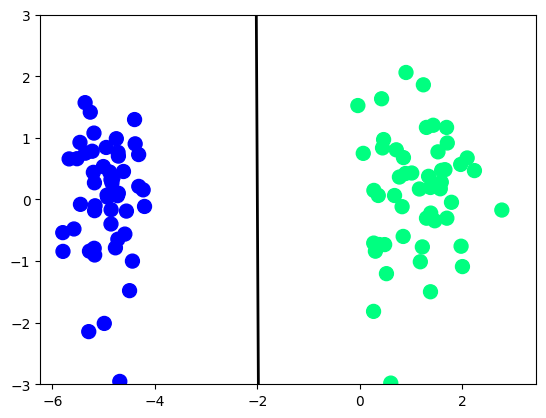

In [119]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b
plt.plot(x_input1,y_input1,color="black",linewidth=2) 
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)
plt.ylim(-3,3)

In [120]:
def perceptron(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights))
    weights = weights +(lr*(y[j]-y_hat)) * X[j]
  
  return weights[0],weights[1:]

def step(z):
  return 1 if z>0 else 0

In [121]:
intercept_,coef_ = perceptron(X,y)
intercept_,coef_

(np.float64(1.2000000000000002), array([1.08682872, 0.52024363]))

In [122]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
m,b

(np.float64(-2.0890764668062958), np.float64(-2.3066116207171747))

In [123]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input2 + b

(-3.0, 2.0)

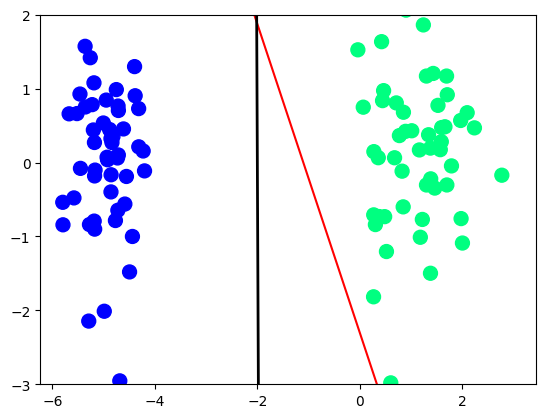

In [124]:
plt.plot(x_input2,y_input2,color="red")
plt.plot(x_input1,y_input1,color="black",linewidth=2) 
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap="winter")
plt.ylim(-3,2)

<code>Sigmoid Function</code><br>
<code>1/1-exp<sup>-z</sup></code>

In [125]:
def perceptron_sigmoid(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(0,100)
    y_hat = sigmoid(np.dot(X[j],weights))
    weights = weights +(lr*(y[j]-y_hat)) * X[j]
  
  return weights[0],weights[1:]

def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [126]:
intercept_,coef_ = perceptron_sigmoid(X,y)
intercept_,coef_

(np.float64(2.584501229975048), array([2.27363647, 0.241153  ]))

In [127]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
m,b

(np.float64(-9.428190712319102), np.float64(-10.717267606994165))

In [128]:
x_input3 = np.linspace(-3,3,100)
y_input3 = m*x_input3 + b

(-3.0, 2.0)

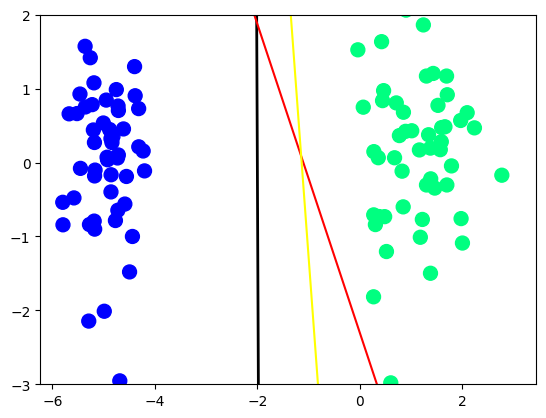

In [129]:
plt.plot(x_input1,y_input1,color="black",linewidth=2) 
plt.plot(x_input2,y_input2,color="red")
plt.plot(x_input3,y_input3,color="yellow")
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap="winter")
plt.ylim(-3,2)

<code>Using Gradient Descent for Logistic Regression </code>

In [138]:
def GD(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.5
  epochs = 5000

  for i in range(epochs):
    y_hat = sigmoid(np.dot(X,weights))
    weights = weights + (lr * np.dot((y - y_hat),X)) / X.shape[0]
  
  return weights[0],weights[1:]

intercept_,coef_ = GD(X,y)
intercept_,coef_

(np.float64(5.102916648814875), array([3.47974267, 0.13305072]))

In [139]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [140]:
x_input4 = np.linspace(-3,3,100)
y_input4 = m*x_input4 + b

(-3.0, 2.0)

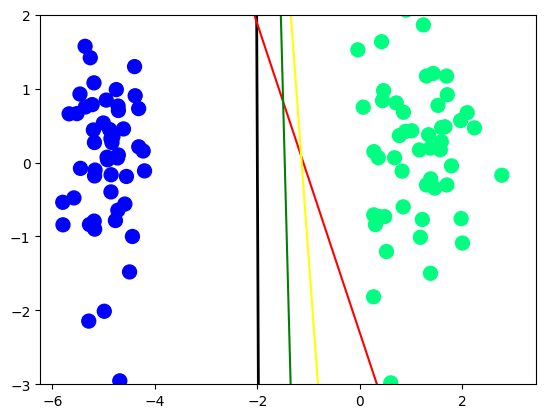

In [141]:
plt.plot(x_input1,y_input1,color="black",linewidth=2)
plt.plot(x_input2,y_input2,color="red")
plt.plot(x_input3,y_input3,color="yellow")
plt.plot(x_input4,y_input4,color="green")
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap="winter")
plt.ylim(-3,2)